In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [8]:
df = pd.read_csv('/kaggle/input/eda-project-analyze-us-citizens/adult_eda.csv')

In [12]:
# Recognizing and Understanding the Data.
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [13]:
df.shape

(32561, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,31735.0,10.084008,2.575060,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [11]:
df.columns=df.columns.str.replace("-","_")
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [18]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [19]:
df.duplicated().value_counts() #check if it has any duplicated values

False    32537
dtype: int64

In [16]:
df = df.drop_duplicates() #drop duplicates

In [14]:
df.shape

(32537, 15)

In [15]:
df.isnull().sum() #checking the sum of values missing per coulumn

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [20]:
df.isnull().sum()/len(df)*100 #check the percentage of missing values

age                0.000000
workclass          0.000000
fnlwgt             0.000000
education          0.000000
education-num      2.464886
marital-status     0.000000
occupation         0.000000
relationship      15.563820
race               0.000000
sex                0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.000000
salary             0.000000
dtype: float64

In [45]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [46]:
object_col=df.loc[:, df.dtypes == object].columns
object_col

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [18]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
----------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
----------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital_status
----------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418


In [23]:
print((df.astype(str) == '?').any())

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool


In [25]:
##Univariate and Multivariate Analysis

In [24]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [27]:
df['salary'].value_counts()

<=50K    24698
>50K      7839
Name: salary, dtype: int64

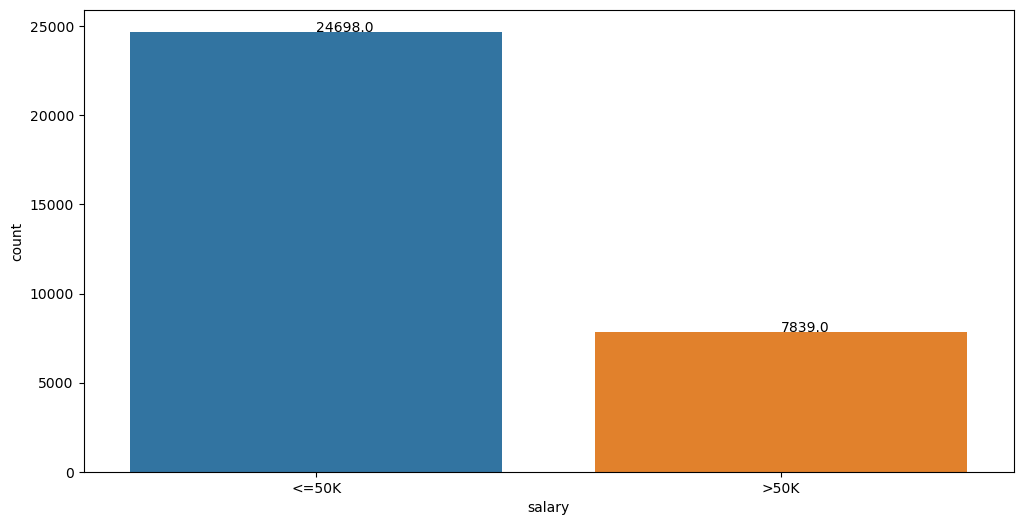

In [28]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="salary",data=df)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + 0.4,p.get_height() + 1),fontsize=10)

In [31]:
percentage_salary= df.salary.value_counts()/len(df)
percentage_salary

<=50K    0.759074
>50K     0.240926
Name: salary, dtype: float64

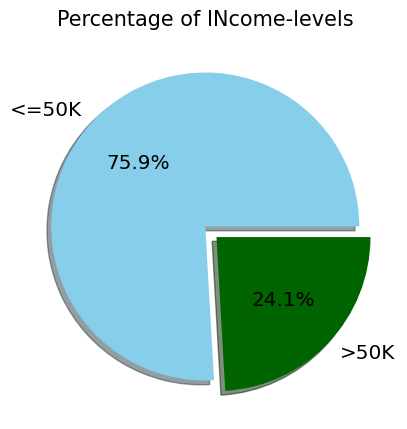

In [39]:
plt.figure(figsize=(10,5))

plt.pie(percentage_salary,
        labels=["<=50K",">50K"],
        autopct="%.1f%%",
        explode=[0,0.1],
        colors=["skyblue","darkgreen"],
        textprops=({'size': 'x-large'}),
        shadow=True);
plt.title("Percentage of INcome-levels",fontsize=15,);

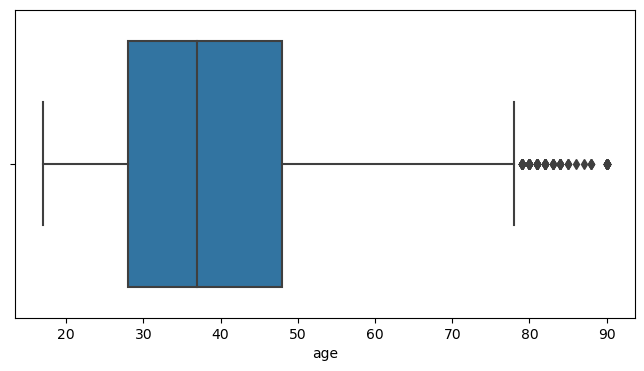

In [40]:
#Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='age',data=df);

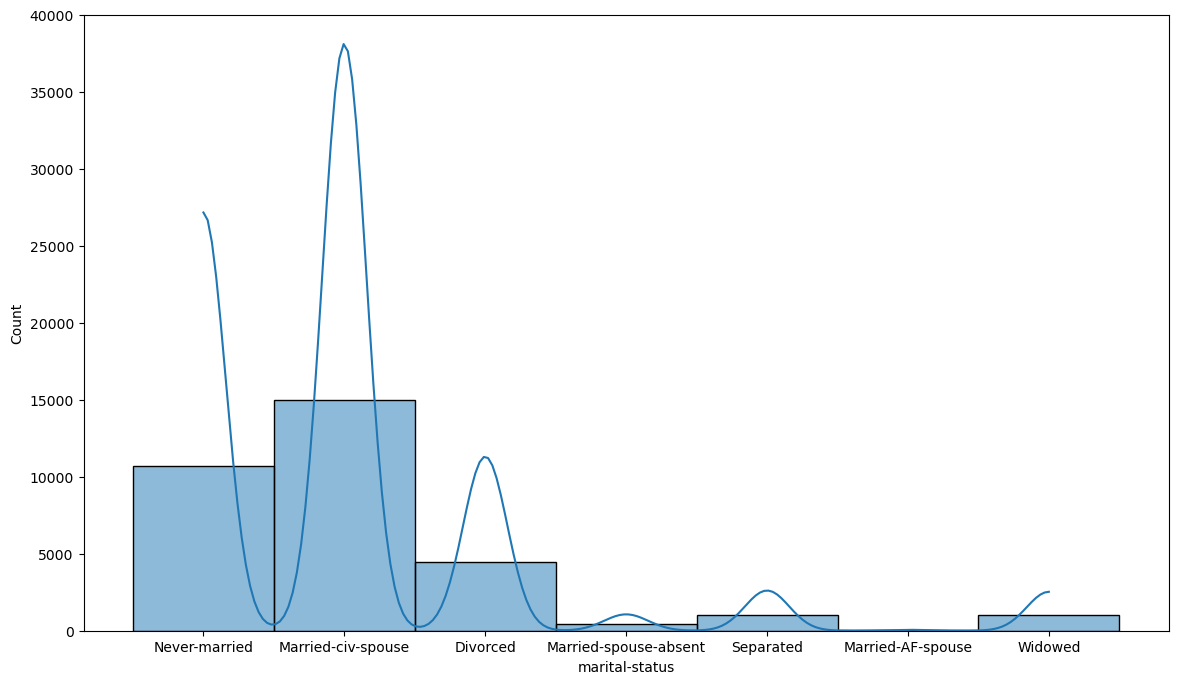

In [45]:
plt.figure(figsize=(14,8))
sns.histplot(x="marital-status",data=df,kde=True,bins=10);

In [46]:
df.age.describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

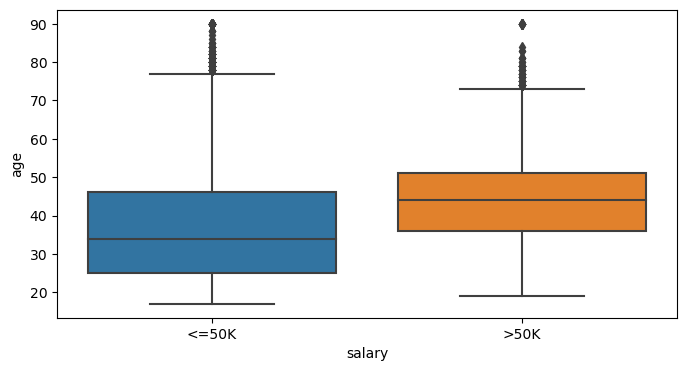

In [48]:
plt.figure(figsize=(8,4))
sns.boxplot(x="salary",y="age",data=df);

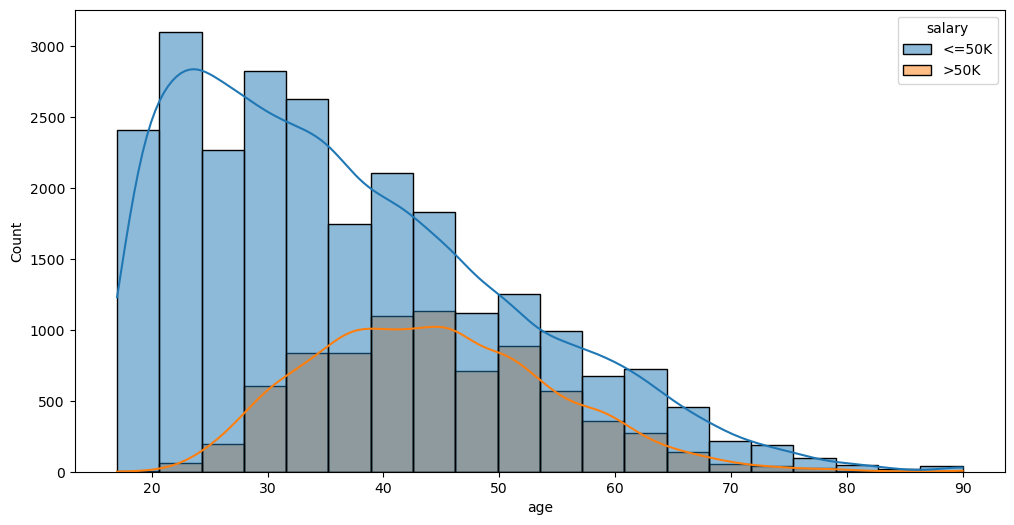

In [9]:
plt.figure(figsize=(12,6))

sns.histplot(x="age",data=df,bins=20,kde=True,hue="salary");

In [13]:
df.groupby("salary")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


In [49]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


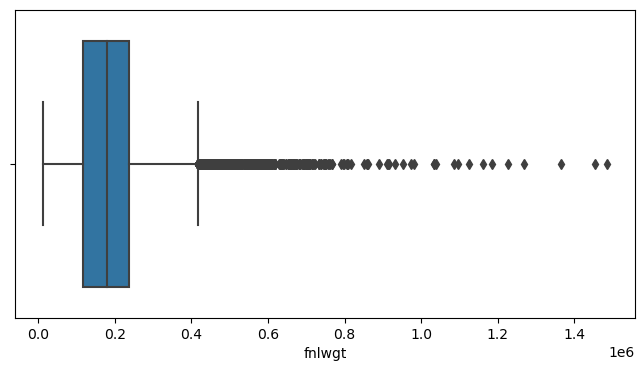

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(x="fnlwgt",data=df);

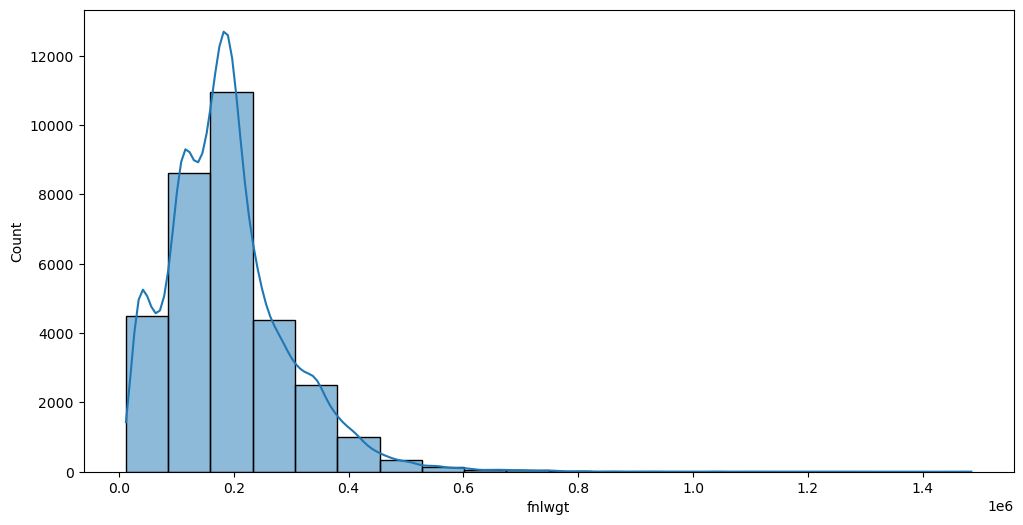

In [20]:
plt.figure(figsize=(12,6))

sns.histplot(x="fnlwgt",data=df,bins=20,kde=True);

In [21]:
df.fnlwgt.describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

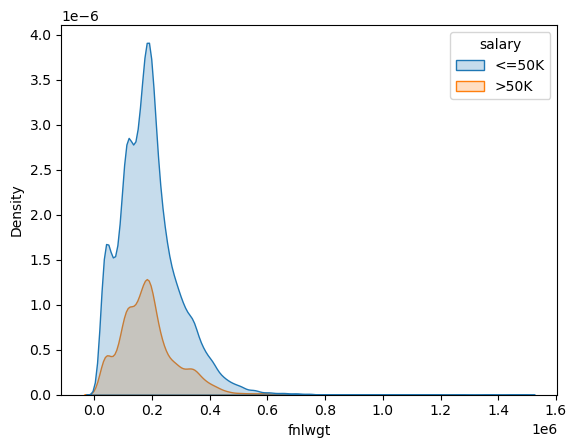

In [24]:
sns.kdeplot(x="fnlwgt",data=df,hue="salary",fill=True);

In [25]:
df.groupby("salary")["fnlwgt"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24720.0,190340.86517,106482.271195,12285.0,117606.0,179465.0,239023.0,1484705.0
>50K,7841.0,188005.00000,102541.775472,14878.0,119101.0,176101.0,230959.0,1226583.0


In [31]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [55]:
df.capital_gain.describe()

AttributeError: 'DataFrame' object has no attribute 'capital_gain'

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


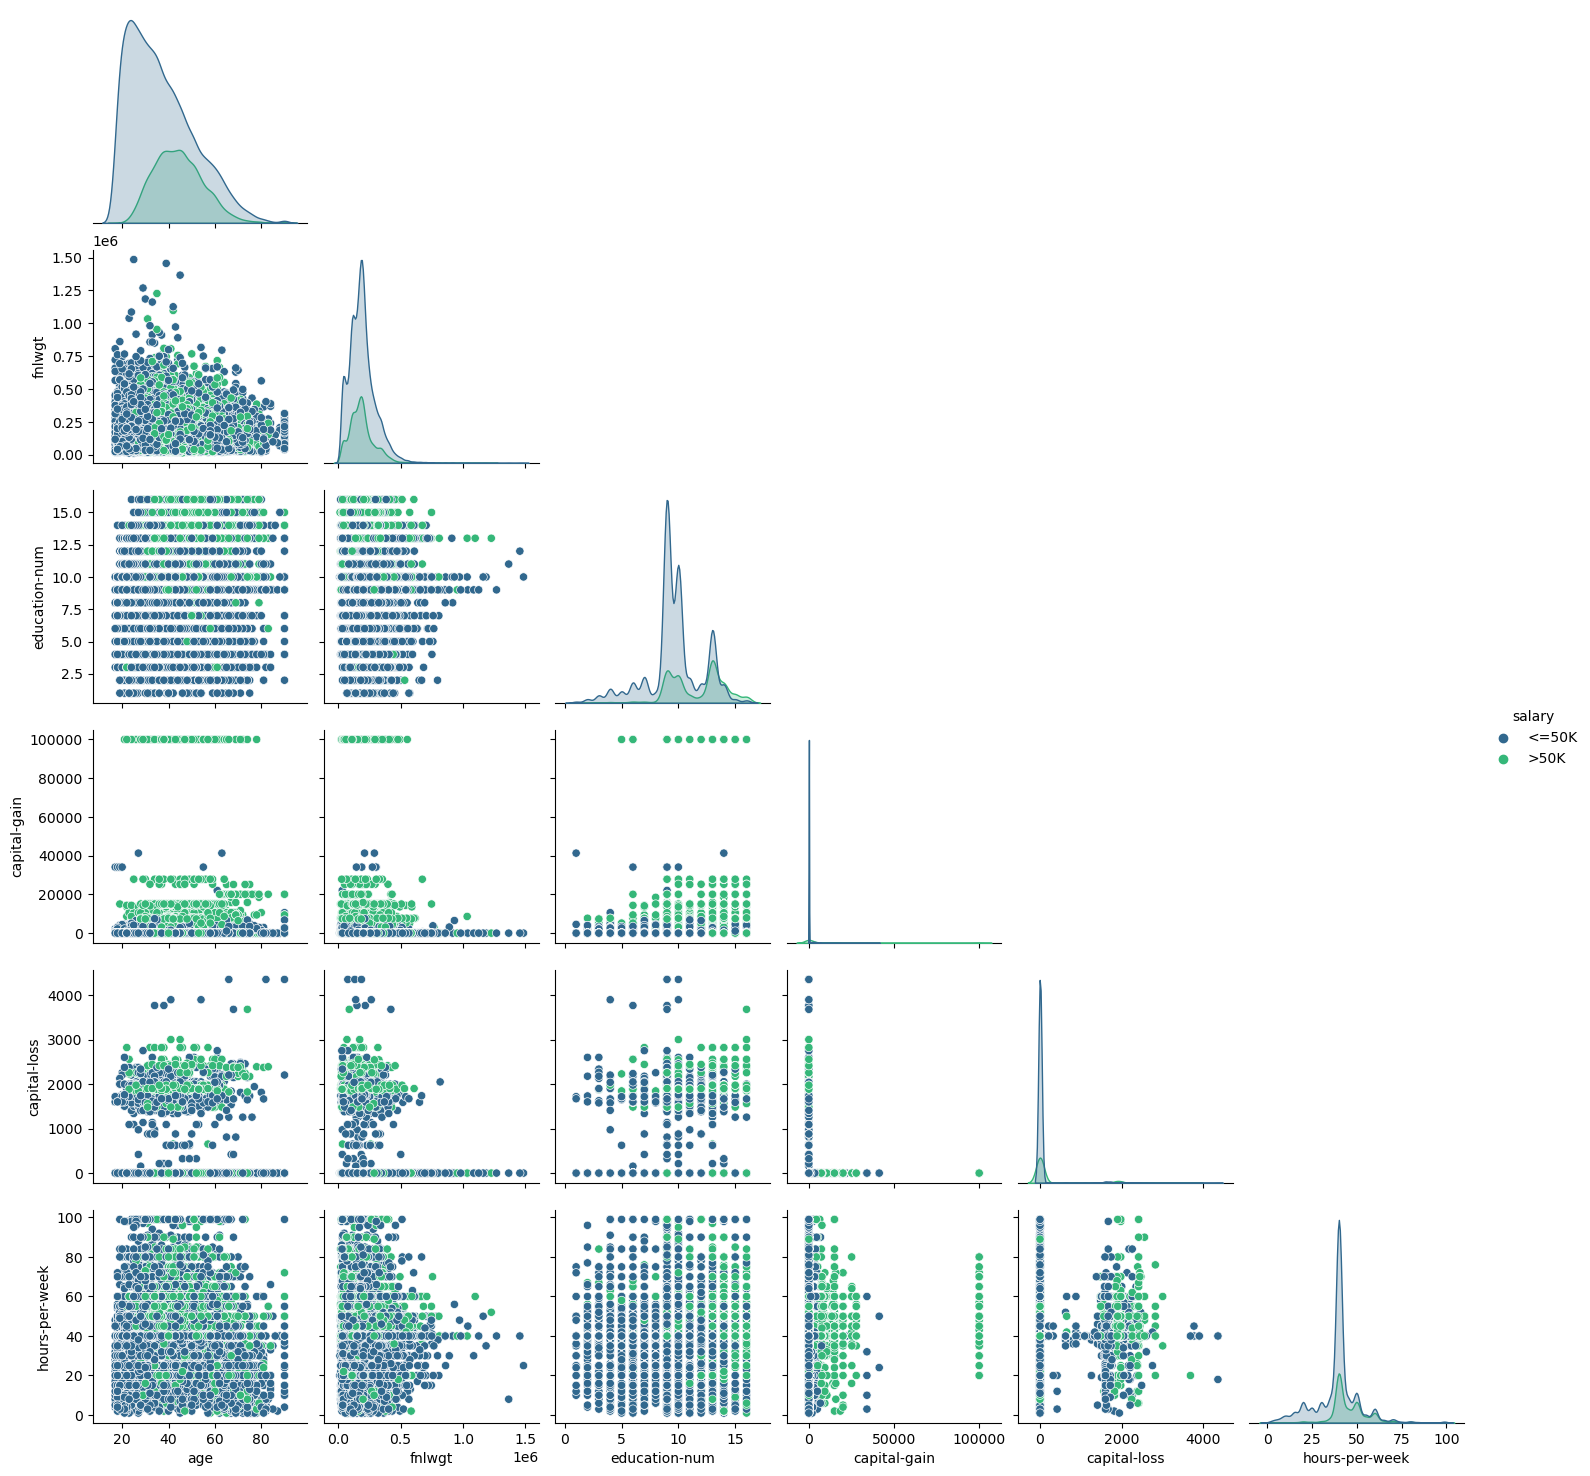

In [54]:
sns.pairplot(df,hue="salary",palette="viridis",corner=True,diag_kind="kde");

In [56]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [58]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

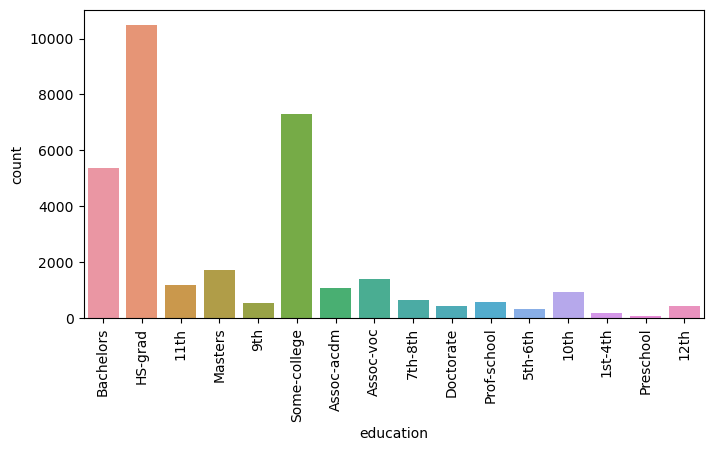

In [61]:
fig,ax = plt.subplots(figsize=(8,4))

sns.countplot(x="education",data=df)

ax.set_xticklabels(df.education.unique(), rotation=90);

ValueError: Could not interpret input 'education_num'

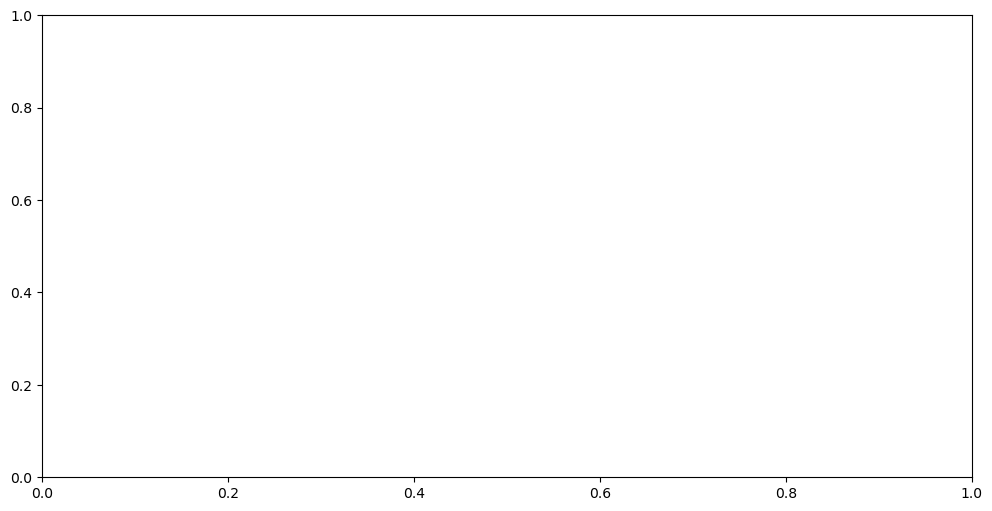

In [62]:
fig,ax = plt.subplots(figsize=(12,6))

sns.countplot(x="education_num",data=df);